In [55]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('fc_kp.csv')

In [26]:
df.shape

(22424, 55)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,kp_index_x3
0,2016-01-01 00:00:00,5.512677,-2.305265,-13.208849,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000
1,2016-01-01 00:00:00,5.512677,-2.305265,-13.208849,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000
2,2016-01-01 03:00:00,3.152941,-0.440106,-12.515978,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333
3,2016-01-01 03:00:00,3.152941,-0.440106,-12.515978,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333
4,2016-01-01 06:00:00,3.226364,-5.161290,-8.537423,143.819967,103.094027,126.3402,129.49592,124.643217,96.82823,...,131.601167,151.2143,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.000


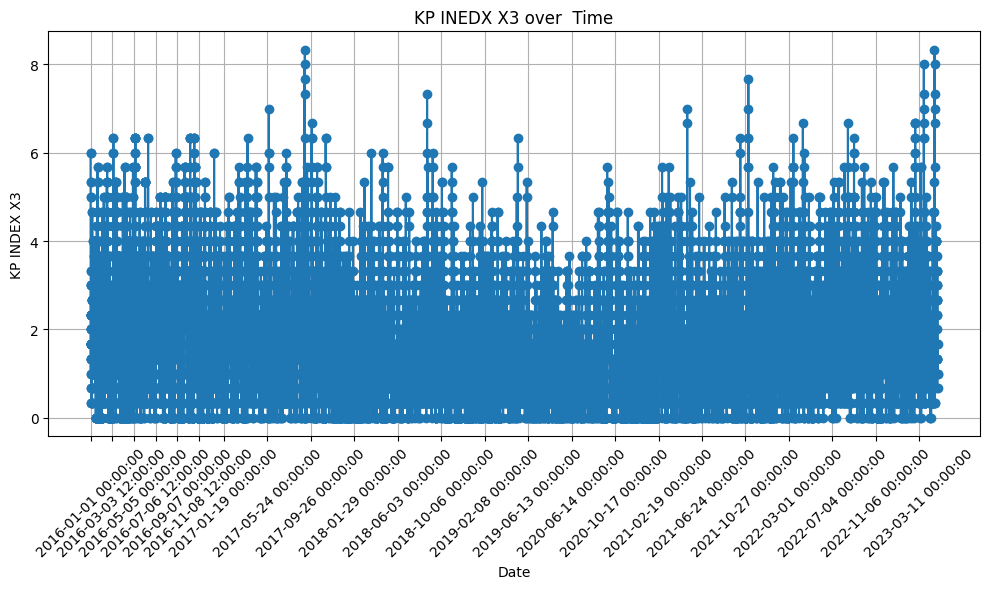

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df.iloc[:, 0], df['kp_index_x3'], marker='o', linestyle='-')
plt.title('KP INEDX X3 over  Time')
plt.xlabel('Date')
plt.ylabel('KP INDEX X3')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.xticks(df.iloc[::1000, 0], rotation=45)

plt.tight_layout()

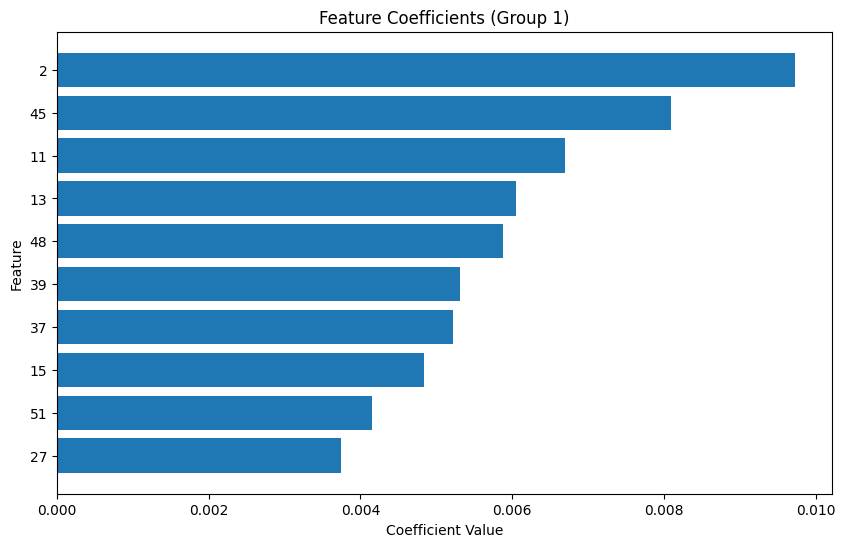

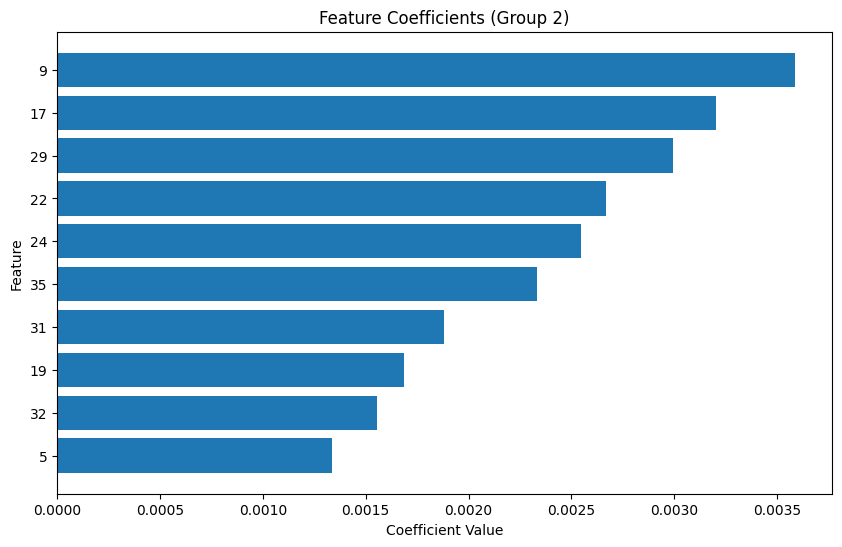

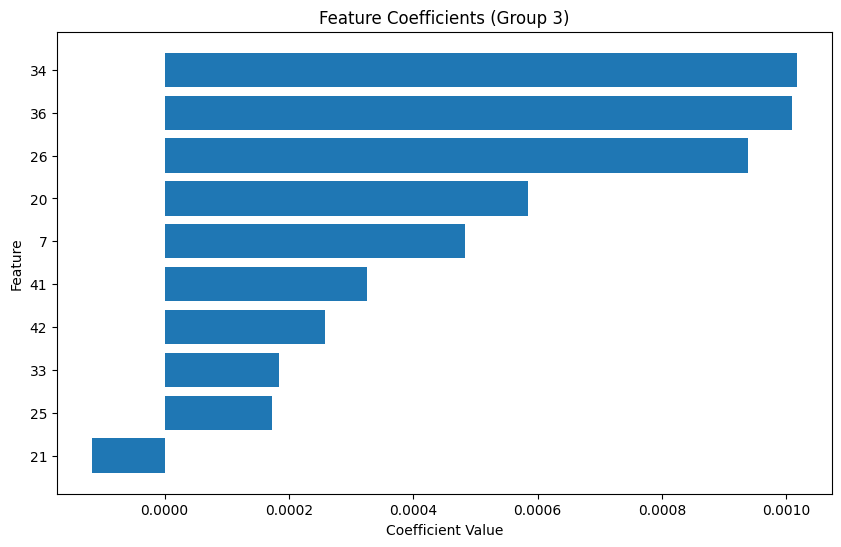

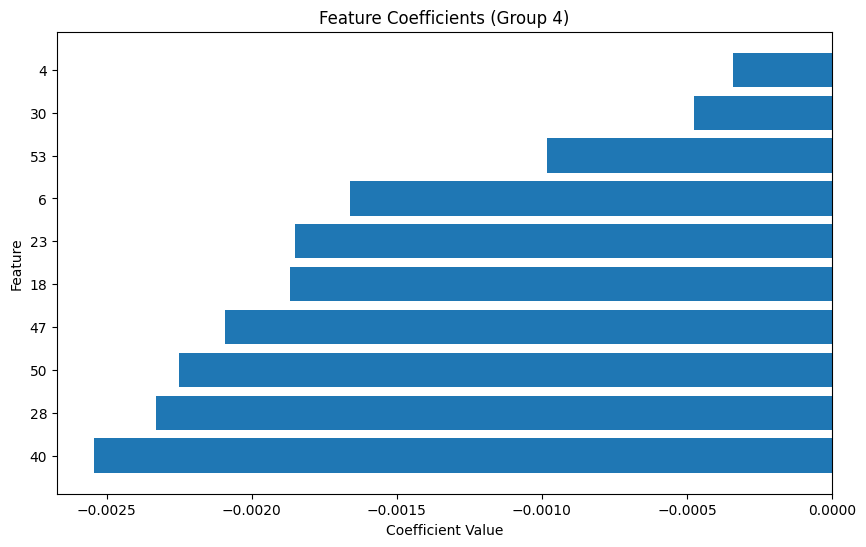

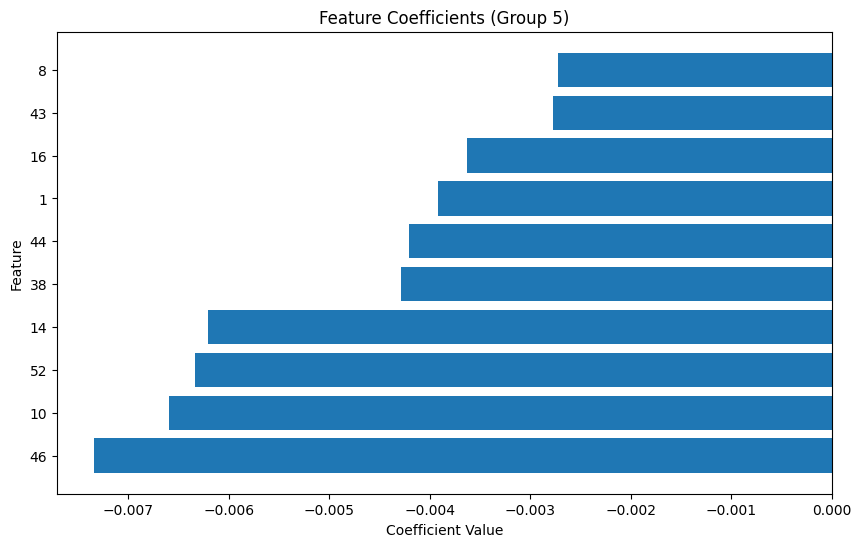

In [61]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_imputed, y_train)

# Get the coefficients from the trained linear regression model
coefficients = linear_model.coef_

# Get the feature names
feature_names = X.columns

# Sort coefficients in descending order
sorted_indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Split the feature names and coefficients into 5 groups for visualization
num_groups = 5  # Number of groups
group_size = len(sorted_feature_names) // num_groups

for i in range(num_groups):
    start_idx = i * group_size
    end_idx = (i + 1) * group_size
    group_feature_names = sorted_feature_names[start_idx:end_idx]
    group_coefficients = sorted_coefficients[start_idx:end_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(group_coefficients)), group_coefficients, align='center')
    plt.yticks(range(len(group_coefficients)), group_feature_names)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Coefficients (Group {i + 1})')
    plt.gca().invert_yaxis()  # Invert the y-axis to display most important features at the top
    plt.show()


In [76]:
df.shape

(22424, 55)